In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pymc as pm
import numpy as np
import pandas as pd

In [3]:
import bayesian_rainfall as br

In [5]:
data = br.model.load_data("data/noaa_historical_weather_eugene_or_2019-2024.csv")
data.head()

,DATE,PRCP,day_of_year
0,2019-01-01,0.0,1
1,2019-01-02,0.0,2
2,2019-01-03,0.0,3
3,2019-01-04,0.3,4
4,2019-01-05,4.6,5


In [6]:
model = br.model.create_rainfall_model(data)
model

         a_rain ~ Normal(0, 2)
         b_rain ~ Normal(0, 2)
         c_rain ~ Normal(0, 1)
       a_amount ~ Normal(0, 2)
       b_amount ~ Normal(0, 2)
       c_amount ~ Normal(1, 1)
   alpha_amount ~ Gamma(2, f())
         p_rain ~ Deterministic(f(b_rain, c_rain, a_rain))
 rain_indicator ~ Bernoulli(p_rain)
rainfall_amount ~ Gamma(alpha_amount, f(alpha_amount, b_amount, c_amount, a_amount))

In [7]:
trace = br.model.sample_model(model)
trace


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a_rain, b_rain, c_rain, a_amount, b_amount, c_amount, alpha_amount]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 9 seconds.


Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [17]:
br.analysis.print_model_summary(trace, data)

=== MODEL SUMMARY ===
Total observations: 2192
Rainy days: 830
Overall rain frequency: 0.379
Mean rainfall on rainy days: 6.465 inches
Max rainfall: 59.400 inches

=== CONVERGENCE DIAGNOSTICS ===
R-hat values (should be < 1.01):
  a_rain: 1.0016
  b_rain: 1.0005
  c_rain: 0.9995
  a_amount: 1.0004
  b_amount: 0.9997
  c_amount: 1.0005
  alpha_amount: 1.0021

=== MODEL FIT ANALYSIS ===
Rain frequency - Observed: 0.379, Predicted: 0.379
Rain frequency error: 0.001 (0.1%)
Rainfall amount (rainy days) - Observed: 6.465, Predicted: 6.482
Rainfall amount error: 0.017 (0.3%)
Monthly rain frequency MAE: 0.059
Average prediction uncertainty (std): 0.016

Overall model fit quality: Excellent

=== SEASONAL PATTERNS ===
Peak rain probability: Day 24 (0.670)
Minimum rain probability: Day 207 (0.130)
Peak rainfall amount: Day 342 (7.769 inches)
Minimum rainfall amount: Day 159 (4.593 inches)


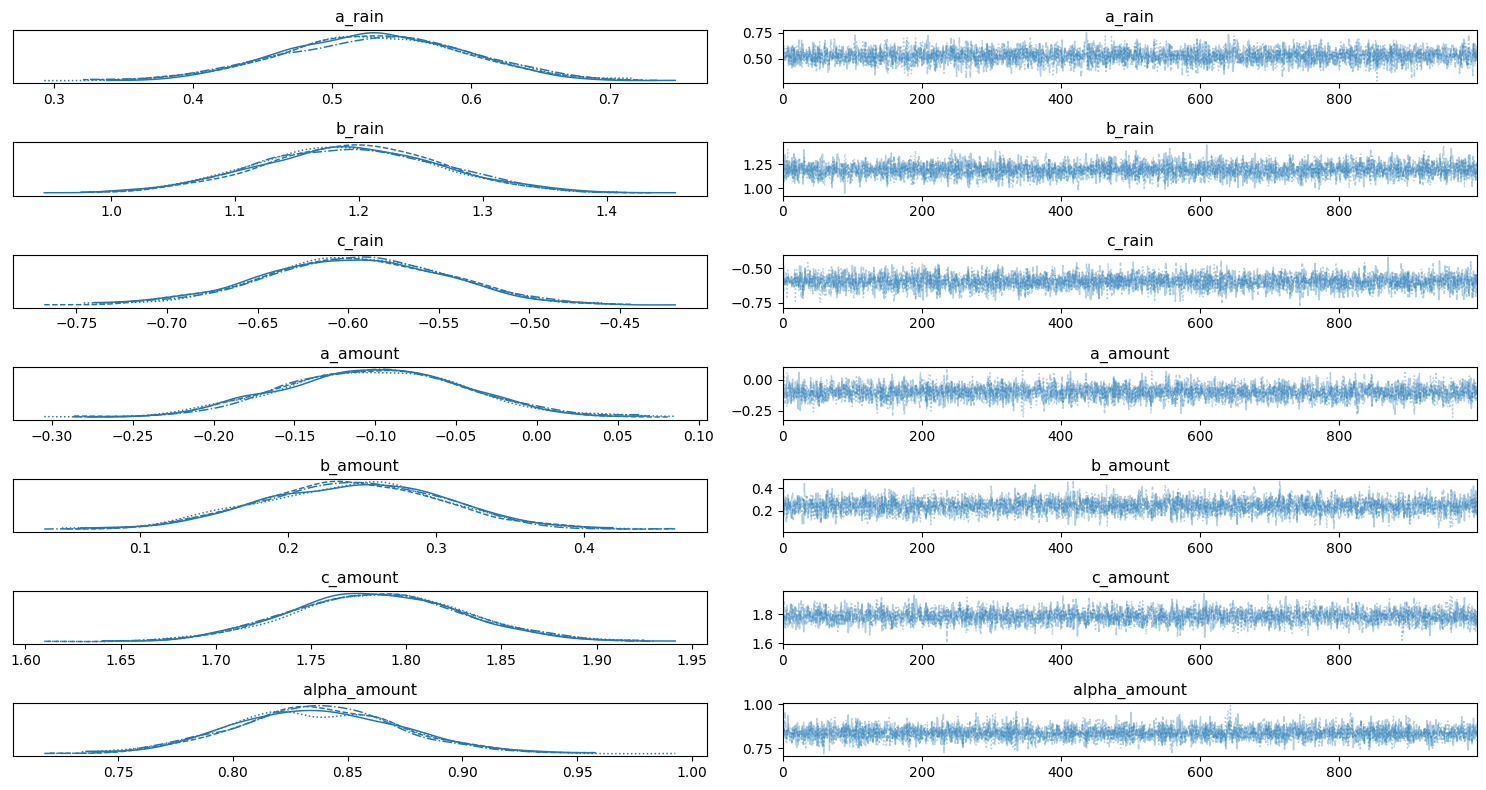

In [9]:
# Trace plots to check MCMC sampling
br.visualizations.plot_trace(trace)


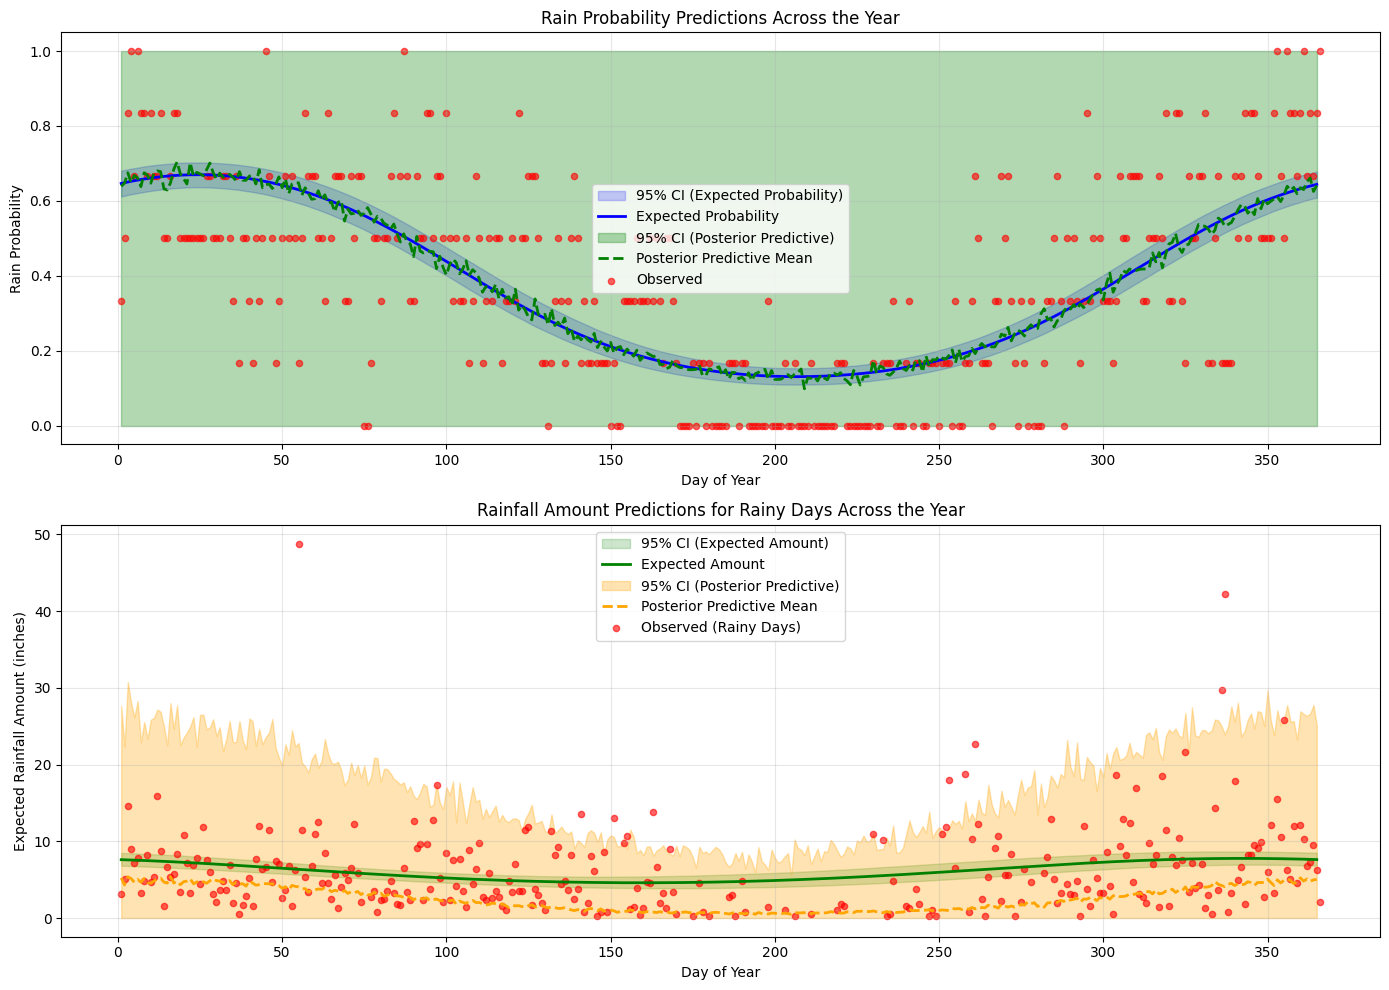

In [10]:
# Combined visualization: Rain probability and amount predictions with both CIs
br.visualizations.plot_combined_predictions(trace, data)


Sampling: [rain_indicator]


Output()

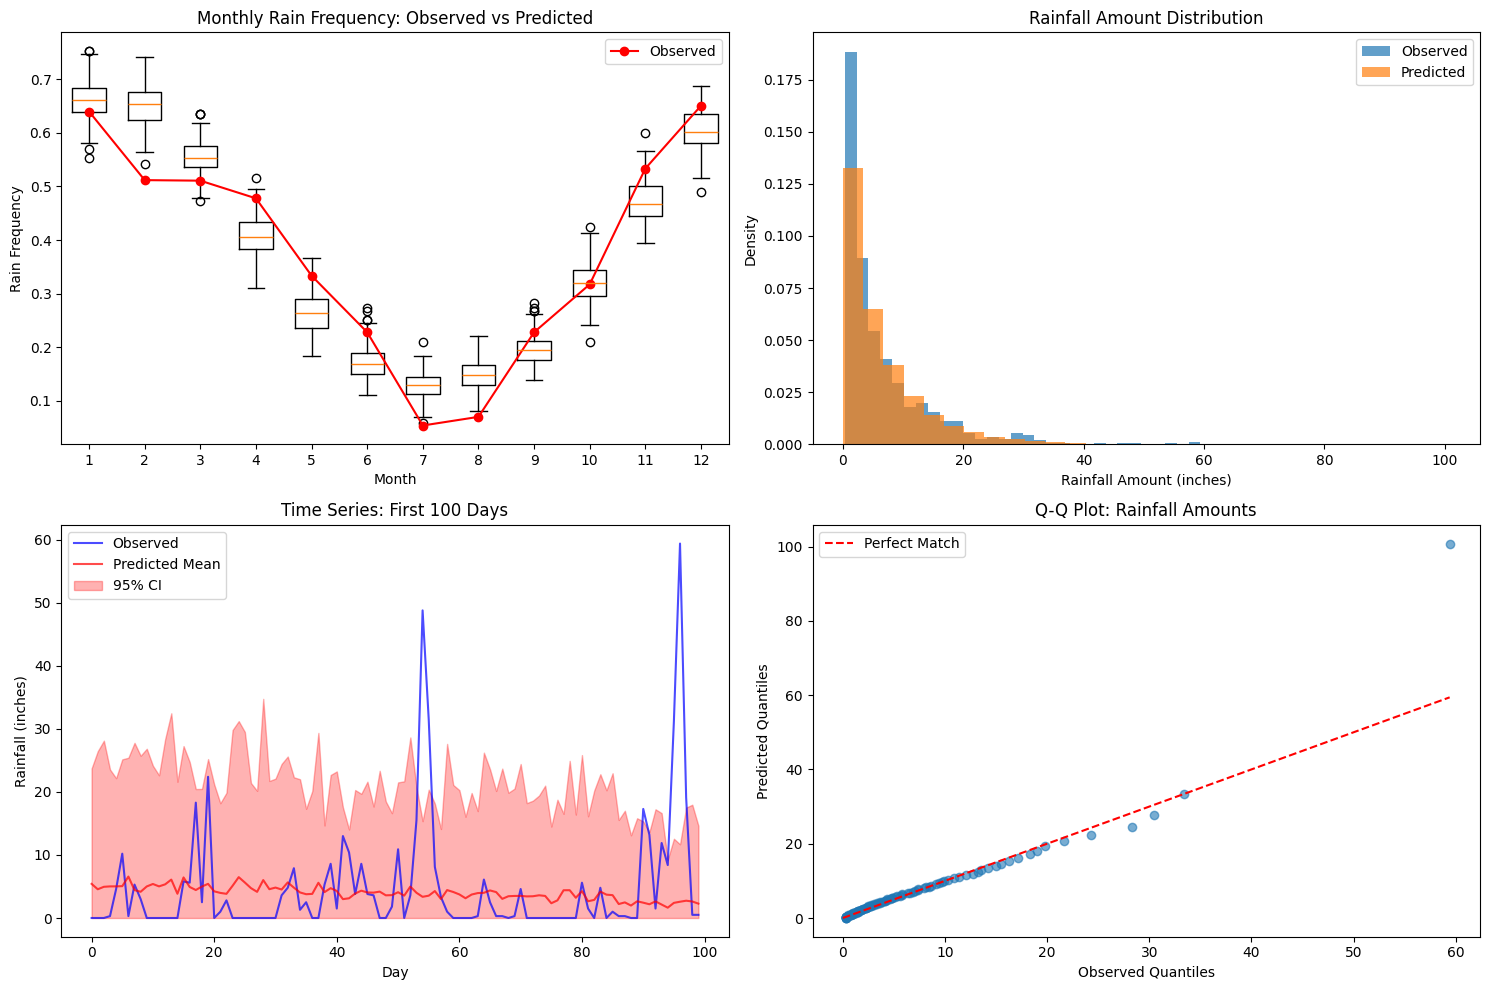

In [11]:
# Posterior predictive checks
br.visualizations.plot_posterior_predictive_checks(trace, model, data)


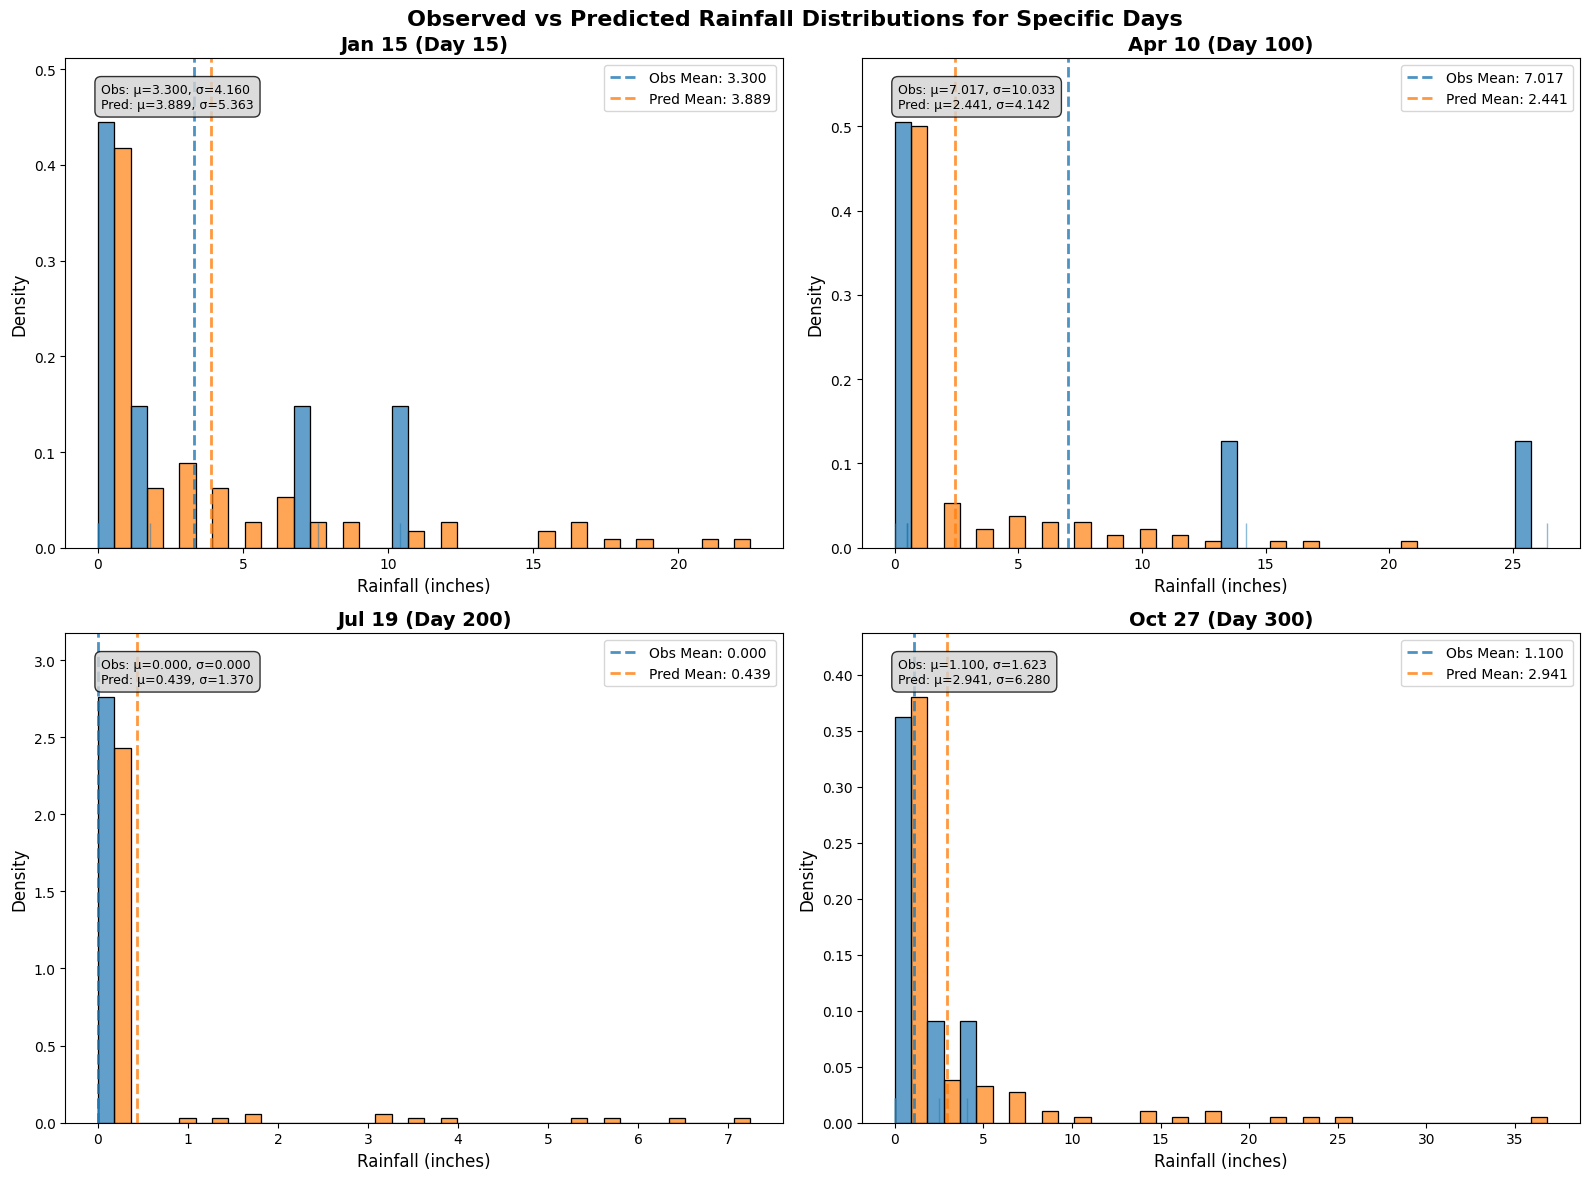

In [13]:
# Plot observed vs predicted rainfall distributions for specific days
br.visualizations.plot_specific_days_comparison(trace, data)

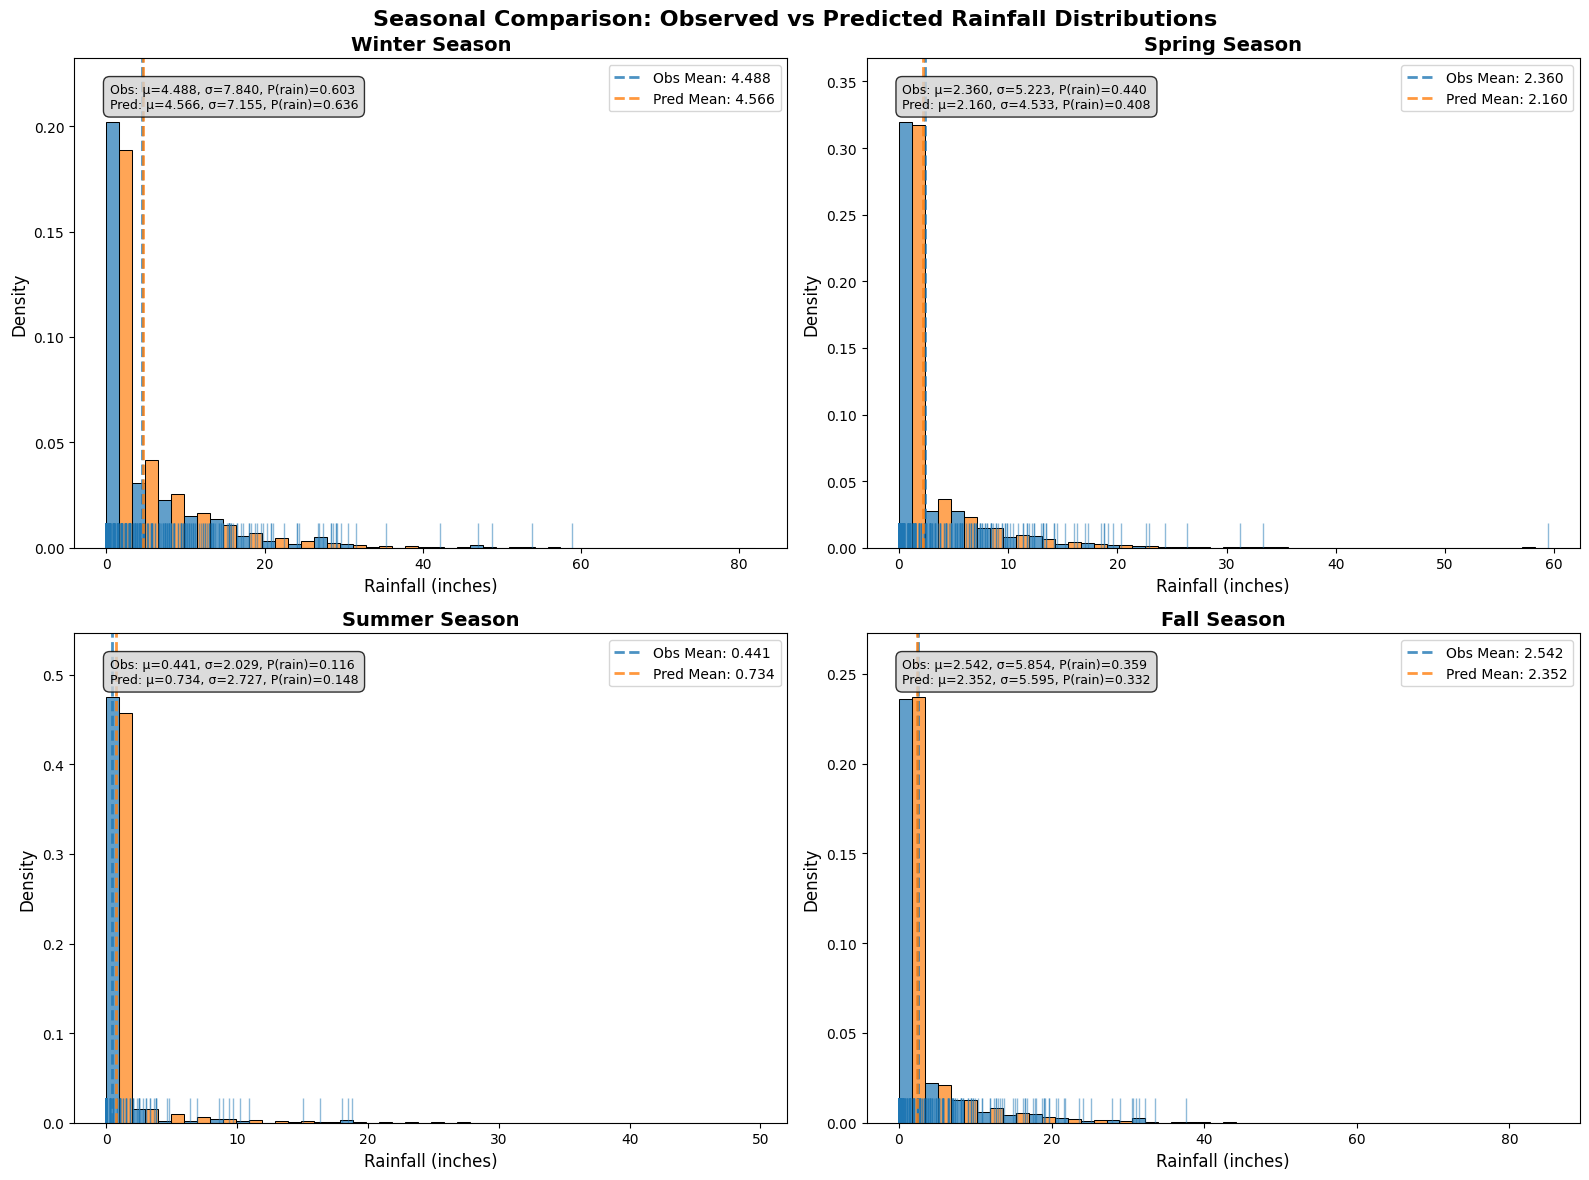

In [14]:
# Seasonal comparison: Observed vs Predicted distributions by season
br.visualizations.plot_seasonal_summaries(trace, data)
